# HW9:  Log Normal Process and Path Dependent Options

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
seed=573903
rng=np.random.default_rng(seed)

## Problem 1: Log Normal Process

### Problem 1.1

Using the function [numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) generate 366 equally spaced time in the range $t \in $[0,1]$

In [3]:
t=np.linspace(0,1,366)
t[:10]

array([0.        , 0.00273973, 0.00547945, 0.00821918, 0.0109589 ,
       0.01369863, 0.01643836, 0.01917808, 0.02191781, 0.02465753])

### Problem 1.2

Compute the array of *time  steps* $\text{d}t_i = t_{i+1}-t_i$ 

you should have 365 time steps 

In [4]:
dt=t[1:]-t[:-1]
print("time steps: ",len(dt))
dt[:10]

time steps:  365


array([0.00273973, 0.00273973, 0.00273973, 0.00273973, 0.00273973,
       0.00273973, 0.00273973, 0.00273973, 0.00273973, 0.00273973])

### Problem 1.3 

Generate $10,000$ paths from t in the range $[0,1]$, all the paths start with $S_0=1$, and with a volatility $\sigma=0.16$ using the function

[HINT] store the paths in a variable so that you can refer to them later.

In [5]:
def geom_brownian_motion(S0,dt,sigma,npaths,rng):
    S=np.empty((len(dt)+1,npaths))
    S[0]=S0*np.ones(npaths) 
    for i in range(len(dt)):
        dW=rng.normal(0,np.sqrt(dt[i]),size=npaths)
        # log-normal process update with drift correction
        S[i+1]=S[i]*np.exp(-0.5*sigma**2*dt[i]+sigma*dW)
    return S

In [6]:
S0=1
npaths=10_000
sigma=0.16

In [7]:
paths=geom_brownian_motion(S0,dt,sigma,npaths,rng)
paths.shape

(366, 10000)

### Problem 1.4

Plot the first 4 paths $S_t$ using `matplotlib` 

Text(0, 0.5, 'S_t')

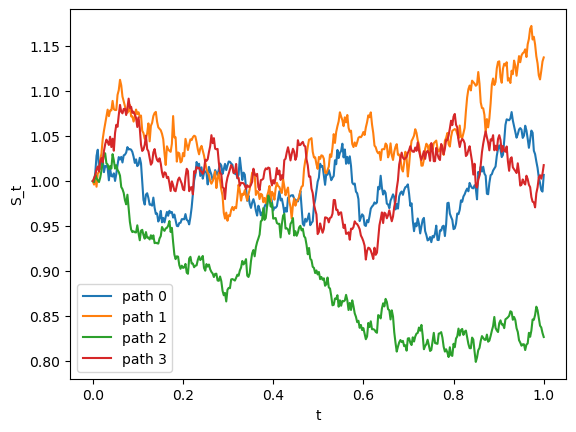

In [8]:
for p in range(4):
    plt.plot(t,paths[:,p],label=f"path {p}")
plt.legend()
plt.xlabel("t")
plt.ylabel("S_t")

### Problem 1.5

Approximately compute the expected value of $S_t$ using the Monte Carlo path average:
$$
    \mathbb{E}(S_t) \approx \bar{S}_t = \frac{1}{\text{npaths}}\sum_{p=1}^{\text{npaths}} S_{t,p}
$$

In [9]:
S_bar=paths.mean(axis=-1)

### Problem 1.6

Compute the **standard error** $\delta \bar{S}_t$ on the estimate of $\bar{S}_t$:

 $$
     \delta \bar{S}_t = \sqrt { \frac{\text{Var}(S_t)}{\text{npaths} } }
 $$

In [10]:
var_S = np.var(paths,axis=-1)
delta_S = np.sqrt(var_S/npaths)
delta_S[:10]

array([0.00000000e+00, 8.49496314e-05, 1.19387554e-04, 1.45588223e-04,
       1.68968544e-04, 1.88617586e-04, 2.07039873e-04, 2.22258301e-04,
       2.38488427e-04, 2.52392688e-04])

### Problem 1.7

Make a plot showing:
1. The expected value of $S_t$: 
    $$\mathbb{E}(S_t) = S_0$$
2. The Monte Carlo estimate for $\mathbb{E}(S_t) \approx \bar{S}_t$
3. The one and two Monte Carlo  deviation confidence intervals  for $\mathbb{E}(S_t)$: $S_t \pm \delta S_t$ and $S_t \pm \delta S_t$


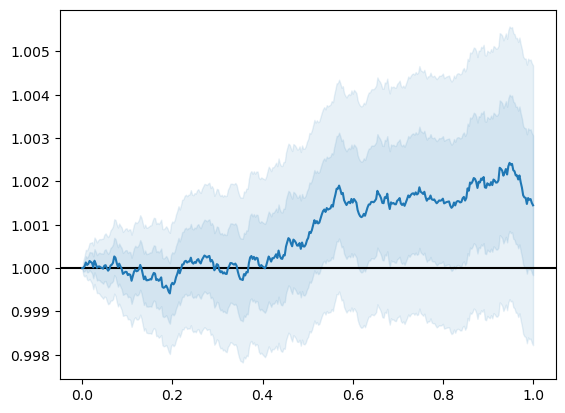

In [11]:
plt.axhline(S0,color="k")
p=plt.plot(t,S_bar)
color=p[0].get_color()
plt.fill_between(t,S_bar-delta_S,S_bar+delta_S,alpha=0.1,color=color)
plt.fill_between(t,S_bar-2*delta_S,S_bar+2*delta_S,alpha=0.1,color=color)


### Problem 1.8

Show that the variance of $\log S_t$ in the Monte Carlo paths is approximately $\sigma^2 t$

In [12]:
log_S=np.log(paths)
var_log_S=np.var(log_S,axis=-1)

Text(0, 0.5, 'Var')

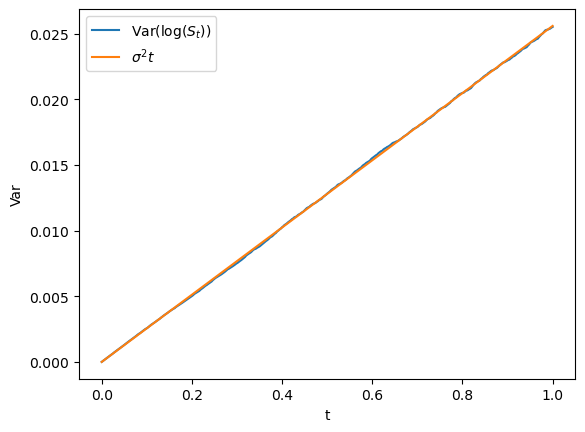

In [13]:
plt.plot(t,var_log_S,label="Var(log($S_t$))")
plt.plot(t,sigma**2*t,label=r"$\sigma^2 t$")
plt.legend()
plt.xlabel("t")
plt.ylabel("Var")

### Problem 1.9

Generate Histograms for $\log S_t$ for $t=\frac{1}{4}$ and $t=1$. So that they are well approximated by Gaussian distributions with variance $\sigma^2 t$

[HINTS]
1. Use `density=True` in [matplotlib.hist](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html) to normalize the histogram.
2. You can use [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) to define the `pdf` of a normal distribution with the appropiate variance.
3. To find the **index** in the path array that  corresponds to a particular expiry $T$ you can use [numpy.searchsorted](https://numpy.org/doc/stable/reference/generated/numpy.searchsorted.html).

In [14]:
t1_idx=np.searchsorted(t,1/4)
t2_idx=np.searchsorted(t,1)
t1_idx,t2_idx

(92, 365)

In [15]:
dist1=stats.norm(0,sigma*np.sqrt(1/4))
dist2=stats.norm(0,sigma)

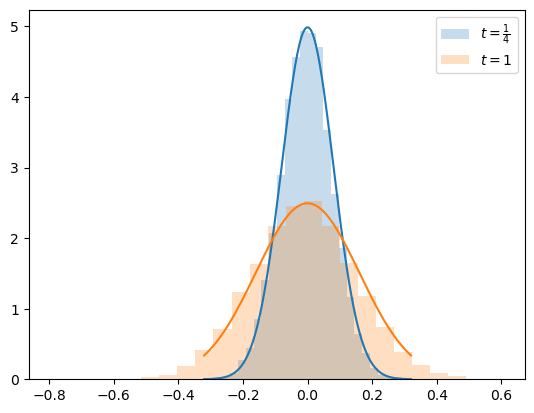

In [16]:
s=np.linspace(-2*sigma,2*sigma,201)
p=plt.plot(s,dist1.pdf(s))
color=p[0].get_color()
plt.hist(np.log(paths[t1_idx]),density=True,bins=25,alpha=0.25,label=r"$t=\frac{1}{4}$",color=color)
p=plt.plot(s,dist2.pdf(s))
color=p[0].get_color()
plt.hist(np.log(paths[t2_idx]),density=True,bins=25,alpha=0.25,label=r"$t=1$",color=color)
plt.legend()

### Problem 1.10

Show that the correlation between $\log S_t$ for $t_1=\frac{1}{4}$ and $t_2=1$ is
$$
    \rho = \sqrt{\frac{t_1}{t_2}} \approx \frac{1}{2}
$$

[HINT]  To compute the correlation coefficient between two arrays you can use [numpy.corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)

In [17]:
S1=log_S[t1_idx]
S2=log_S[t2_idx]

In [18]:
np.corrcoef(S1,S2)

array([[1.        , 0.50998397],
       [0.50998397, 1.        ]])

## Problem 2: European Option Price

### Problem 2.1

Price a $T=1$ year strike $K=1$ **call option** assuming zero interest rest and dividends and a volatility $\sigma=16$%

Using formula:
$$
    P = \mathbb{E}\left[ \max(0,S_T-K) \right] \approx \frac{1}{\text{npaths}} \sum_{p=1}^{\text{paths}} O_p
$$
where $O_p$ is the **call option payoff** in path $p$
$$
    O_p = \max( 0, S_{T,p} - K)
$$


In [19]:
K=1

In [20]:
s=paths[-1] # T-1  is the last element of the array
O=np.maximum(0,s-K)

In [21]:
price=np.mean(O)
price

0.06426212886298331

### Problem 2.2

Compute the Monte Carlo *standard error* of price
$$
    \delta P = \sqrt{ \frac{\text{Var}(O)}{\text{npaths}}}
$$ 

where $O$ is again the option payoff  $O= \max(0,S_T-K)$

In [22]:
dprice= np.sqrt(np.var(O)/npaths)
dprice

0.0010409215069519743

### Problem 2.3

Use the Black-Scholes formula (implemented in python below) to compute the theoretical price of a call option with expiry $T=1$, strike $K=1$
**forward** $F=1$ (because dividends or interest rates are zero) and volatility $\sigma=16$%

In [23]:
ndtr=stats.norm.cdf
epsilon=1e-6

def bs_price_fwd(isCall, K, T, F, sigma):
    """ Black's pricing formula
    
    European option  forward price as a function of
    the asset's forward.
    
    :param isCall: True for calls , False for Puts
    :type isCall: Boolean
    :param K: option strike
    :param T: option expiry in years
    :param F: forward of the options underlying asset
    :param sigma: underlying's  volatility
    :return: option's forward price
    """
    
    ds=np.maximum(epsilon,sigma*np.sqrt(T))
    var=0.5*ds*ds
    d2=(np.log(F/np.maximum(K,epsilon))-var)/ds
    d1=d2+ds
    if isCall:
        opt= F*ndtr(d1) - K*ndtr(d2)
    else:
        opt= K*ndtr(-d2) - F*ndtr(-d1)
    return opt

In [24]:
T=1
F=1

In [25]:
bs_price=bs_price_fwd(True, K,T,F,sigma)
bs_price

0.06376274402797483

### Problem 2.4

Compare the Monte Carlo price the the theoretical Black-Scholes price, taking into account the standard error of the MC price.

In [26]:
(price-bs_price)/dprice

0.4797526342507639

### Problem 2.5

Compute price, standard error or price and compare to the theoretical Black-Scholes price for a **put option** 
with strike $K=0.95$, expiry $T=\frac{1}{4}$  assuming zero interest rates and dividiends and $\sigma=16$\% volatility


In [27]:
T=0.25

In [28]:
t_idx=np.searchsorted(t,T)
t_idx

92

In [29]:
S=paths[t_idx]
S.shape

(10000,)

In [30]:
K=0.95
is_Call=False

In [31]:
O=np.maximum(0, K - S)

In [32]:
price=np.mean(O)
dprice=np.sqrt(np.var(O)/npaths)
price,dprice

(0.012263082350386386, 0.00027625066363089207)

In [33]:
bs_price=bs_price_fwd(is_Call,K,T,F,sigma)
bs_price

0.012288248626253384

In [34]:
(price-bs_price)/dprice

-0.09109942230083923

## Problem 3: Market Inputs to  Log Normal Process

In [35]:
class Discount:
    def __init__(self,ts,rates):
        self.ts=ts
        self.rates=rates
    def __call__(self,T):
        r=np.interp(T,self.ts,self.rates)
        return np.exp(-r*T)
 
class Forward:
    def __init__(self,spot,discount,dividends):
        self.spot=spot
        self.discount=discount
        self.dividends=dividends
    def __call__(self,T):
        Df_r=self.discount(T)
        Df_d=self.dividends(T)
        return self.spot*Df_d/Df_r
        
class VolCurve: #
    def __init__(self,ts,vols): # anualized volatilities, t in years
        vars=vols**2*ts
        self.ts=ts
        # variance is zero at t=0
        self.ts=np.insert(self.ts,[0],[0])
        self.vars=np.insert(vars,[0],[0])
    def var(self,T):
        return np.interp(T,self.ts,self.vars) 
    def __call__(self,T):
        return np.sqrt(self.var(T)/T)
    def local_vol(self,T,K,F,dT):
        dvar=self.var(T+dT)-self.var(T)
        return np.sqrt(dvar/dT)


### Problem 3.1 

Define interest rate discount curves such that tor times $t=\frac{1}{4},\frac{1}{2}, \text {and } 1$. Interest rates are $2\%,2.5\%, \text{ and } 3\%$ respectively

Make a plot discount factors and interest rates in the range $\frac{1}{365},1$.

[HINT] The rate at time $t$ can be computed as 
$$
  r_t  = -\frac{\log\text{df}_t  }{t}
$$
where $\text{df}_t$ is the discount factor at time $t$

In [36]:
ts=[0.25,0.5,1]
rs=[.02,.025,.03]

In [37]:
discount=Discount(ts,rs)

Text(0, 0.5, 'rate')

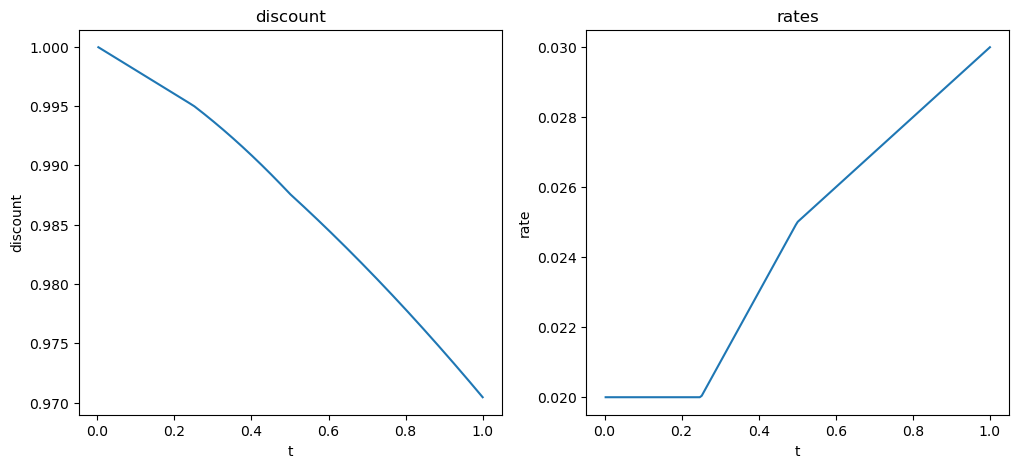

In [38]:
Ts=np.linspace(1/365,1,201)

fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("discount")
plt.plot(Ts,discount(Ts))
plt.xlabel("t")
plt.ylabel("discount")

plt.subplot(1,2,2)
plt.title("rates")
plt.plot(Ts,-np.log(discount(Ts))/Ts)
plt.xlabel("t")
plt.ylabel("rate")

### Problem 3.2

Define a forward curve where the spot value  $F_0 = 1$, Interest rates $r_t$ are as defined by  the discount curve  $r_t$ from problem 3.1 and dividends are zero.

Make a graph of $F_t$ in the range $t\in [0,1]$.

In [39]:
S0=1

In [40]:
dividends=[0,0,0]
divs=Discount(ts,dividends)

In [41]:
fwd=Forward(S0,discount,divs)

Text(0, 0.5, '$F_t$')

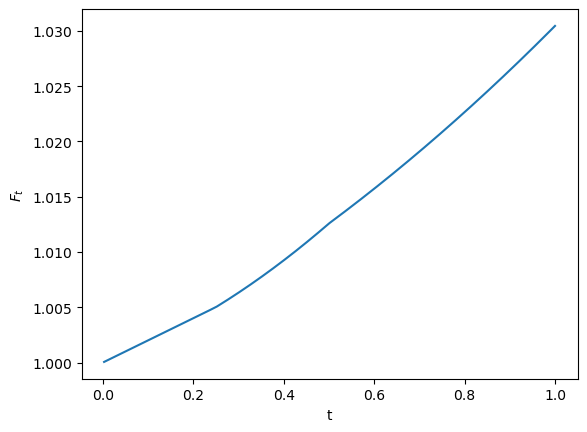

In [42]:
plt.plot(Ts,fwd(Ts))
plt.xlabel("t")
plt.ylabel(r"$F_t$")

### Problem 3.3 

Define a **volatility curve** such that tor times $t=\frac{1}{4},\frac{1}{2}, \text {and } 1$ implied volatilities are  $15\%,17\%, \text{ and } 19\%$ respectively

Make plots of
1. Implied Volatility $$\sigma_I(t)$$
1. Cumulative Variance
   $$
       \text{Var}(t) = \sigma_I^2(t)\, t
   $$
1. Forward Volatility
    $$
    \sigma_F(t) = \sqrt{ \frac{\text{Var}(t+\Delta t) - \text{Var}(t)}{\Delta t}}
    $$

in the range $t\in [\frac{1}{365},1]$

In [43]:
sigmas=np.array([0.15,0.17,0.19])


In [44]:
vol=VolCurve(ts,sigmas)

(0.0, 1.0)

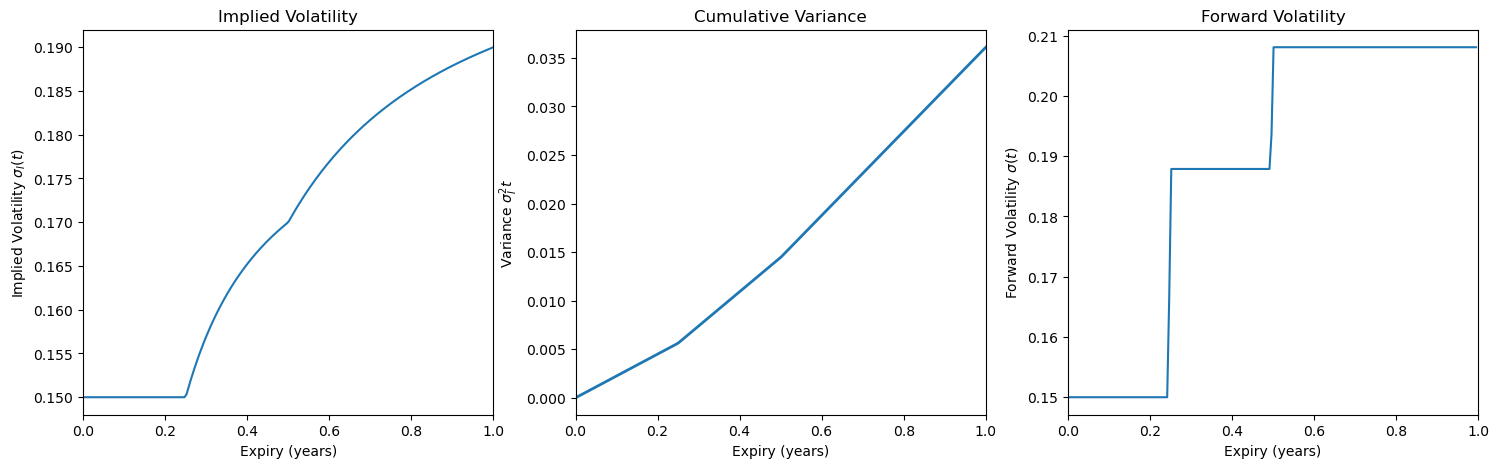

In [45]:
var=vol.var(Ts)
dts=np.diff(Ts)
dvar=np.diff(var)
forward_vol=np.sqrt(dvar/dts)
fig=plt.figure(figsize=(18,5))



plt.subplot(1,3,1)
plt.plot(Ts,vol(Ts))
plt.title("Implied Volatility")
plt.xlabel("Expiry (years)")
plt.ylabel(r"Implied Volatility $\sigma_I(t)$")
plt.xlim(0,1)

plt.subplot(1,3,2)
plt.plot(Ts,vol.var(Ts),linewidth=2)
plt.title("Cumulative Variance")
plt.xlabel("Expiry (years)")
plt.ylabel(r"Variance $\sigma_I^2 t$")
plt.xlim(0,1)

plt.subplot(1,3,3)
plt.plot(Ts[:-1],forward_vol)
plt.title("Forward Volatility")
plt.xlabel("Expiry (years)")
plt.ylabel(r"Forward Volatility $\sigma(t)$")
plt.xlim(0,1)


## Problem 4: Time Dependend Log Normal Process

In [46]:
class LogNormalProcess:
    def __init__(self,fwd,vol):
        self.fwd=fwd
        self.vol=vol
    def nfactors(self):
        return 1
    def __call__(self,s0,t0,dt,dZ):
        df=self.fwd(t0+dt)/self.fwd(t0)
        var=self.vol.var(t0+dt)-self.vol.var(t0)
        s1=s0*df*np.exp(-0.5*var+np.sqrt(var)*dZ)
        return s1

In [47]:
def propagate(process,s0,ts,rng,npaths):
    nsteps=len(ts)
    nvars=len(s0)
    S=np.empty((nsteps,nvars,npaths))
    S[0]=s0[:,np.newaxis]
    nfactors=process.nfactors()
    for it,t in enumerate(ts[:-1]):
        dt=ts[it+1]-t
        dZ=rng.standard_normal((nfactors,npaths))
        S[it+1]=process(S[it],t,dt,dZ)
    return S


### Problem 4.1

Define a **log normal process** using class `LogNormalProcess` and the Forward and volatility curve defined in Problem 3




In [48]:
process=LogNormalProcess(fwd,vol)
process

### Problem 4.2

Generate $\text{npaths}=10,000$ random variables with a Gaussian distribution
$$
    \text{d}Z \sim \mathcal{N}(0, 1)
$$

In [49]:
npaths=10_000

In [50]:
dZ=rng.normal(0,1,size=npaths)
dZ.size

10000

### Problem 4.3

Advance the log normal process one step by defining
1. $s=1$ as an initial array of $\text{npaths}=10,000$ intial conditions
2. $t_0=0$ as the initial time.
2. $\text{d}t=\frac{1}{12}$ (one month) as the size of the time step.
3. $\text{d}Z$ the array of normal *innovations* you defined on problem 4.1.

[HINTS] 
If you have defined `process` as a `LogNormalProcess` object, the syntax to generate $s_{t+\text{d}t}$ given $s_t$  is `s1=process(s,t0,dt,dZ)`


In [51]:
t0=0
dt=1/12
s0=np.ones(npaths)
s1=process(s0,t0,dt,dZ)
s1.shape

(10000,)

### Problem 4.4 

Show that for the $S_1=s_{t+\text{d}t}$ observations generated in problem 4.1:

\begin{align*}
    \bar{S_1} = \frac{1}{\text{npaths}}\sum_{p=1}^{\text{npaths}} s_{1,p} &\approx F_{t_0+\delta t} \\
     \text{Var}(S_1) &\approx \sigma_I^2(t_0) \text{d} t
\end{align*}

where $t_0=0$ and $\text{d}t =\frac{1}{12}$ within the MC sampling accuracy.


In [52]:
s1.mean(),fwd(t0+dt)

(1.002115643245971, 1.001668056327482)

In [53]:
ds1=np.sqrt(s1.var()/npaths)
ds1

0.0004303842558395641

In [54]:
(s1.mean()-fwd(t0+dt))/ds1

1.0399704738638382

In [55]:
s1.var(),vol.var(dt)

(0.001852306076745754, 0.001875)

### Problem 4.5

1. define an array **with one element** numpy array s0=1 for the start of the Monte Carlo paths. 

2. Like in problem 1.1 using the function [numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) generate 366 equally spaced time in the range $t \in [0,1]$.
3. Generate $\text{npaths}=10,000$ Monte Carlo Paths using the function `propagate` defined above.

What is the shape of the generated `paths` array?

In [56]:
s0=np.array([1])
ts=np.linspace(0,1,366)

In [57]:
paths=propagate(process,s0,ts,rng,npaths)
paths.shape

(366, 1, 10000)

### Problem 4.6

In a graph of $S_t$ for $t\in [0,1]$ Compare the mean of $s_t$ to the forward $F_t$ within the context of the Monte Carlo standar error

In [58]:
mean=paths.mean(axis=-1)[:,0]
mean.shape

(366,)

In [59]:
std=np.sqrt(paths.var(axis=-1)[:,0]/npaths)

Text(0, 0.5, 'S_t')

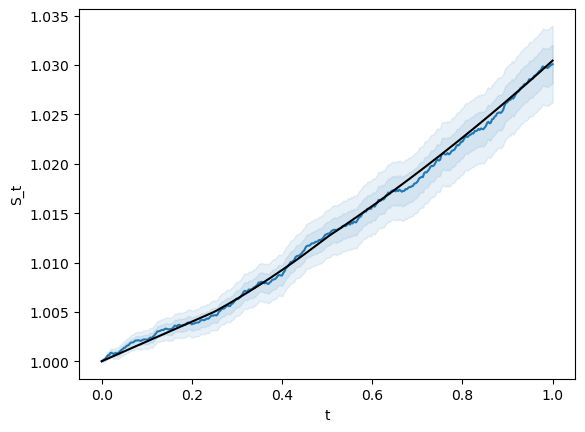

In [60]:
p=plt.plot(ts,mean,label="MC mean")
color=p[0].get_color()
plt.fill_between(ts,mean-std,mean+std,alpha=0.1,color=color)
plt.fill_between(ts,mean-2*std,mean+2*std,alpha=0.1,color=color)
plt.plot(ts,fwd(ts),"k",label="Market Forward")
plt.xlabel("t")
plt.ylabel("S_t")

### Problem 4.7

In a graph for $t\in [0,1]$ compare the Monte Carlo variance of $\log S_t$ to the market expected variance $\sigma_I^2(t)\, t$

In [61]:
var=np.log(paths).var(axis=-1)[:,0]
var.shape

(366,)

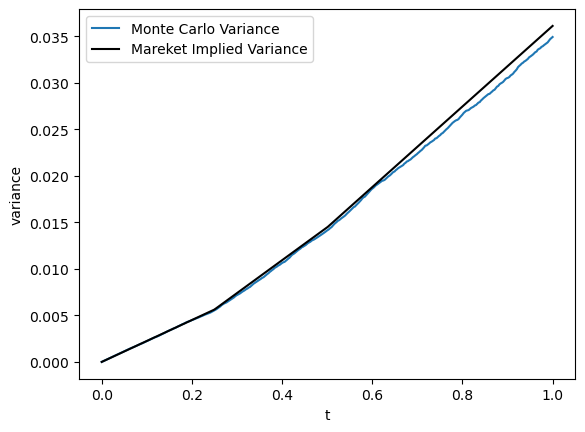

In [62]:
plt.plot(ts,var,label="Monte Carlo Variance")
plt.plot(ts,vol.var(ts),"k",label="Mareket Implied Variance")
plt.xlabel("t")
plt.ylabel("variance")
plt.legend()

## Problem 5: European Option Term Structure

In [63]:
class OptionPayoff:
    def __init__(self,is_call,strike,expiry,index=0):
        if is_call: self.is_call= 1
        else:       self.is_call=-1
        self.strike=strike
        self.expiry=expiry
        self.index=index
    def set_steps(self,ts):
        self.step=np.searchsorted(ts,self.expiry)
    def __call__(self,paths):
        s=paths[self.step,self.index]
        val=np.maximum(0.0,self.is_call*(s-self.strike))
        return val

### Problem 5.1

Define a call option payoff with expiry $T=1$ and strike $K=1$

In [64]:
is_call=True
T=1.0
K=1.0

In [65]:
payoff=OptionPayoff(is_call,K,T)
payoff

### Problem 5.2

Use the method `OptionPayoff.set_steps()` so that the payoff can map the Monte Carlo path array to the appropriate tme steps.  

In [66]:
payoff.set_steps(ts)

### Problem 5.3

Evaluate the payoff over the paths regerated in problem 4. How many results do you get?

In [67]:
value=payoff(paths)
value.shape

(10000,)

### Problem 5.4

Compute the mean and standard error of the option payoff and compare it to the Black-Scholes value.

[HINT] The Black-Scholes value has a forward $F_t$ and a volatility $\sigma_I(t)$ as defined in Problem 3.

In [68]:
opt=value.mean()
dopt=np.sqrt(value.var()/npaths)
opt,dopt

(0.09145000160317233, 0.001350355424932425)

In [69]:
F=fwd(T)
sig=vol(T)
F,sig

(1.030454533953517, 0.19)

In [70]:
bs_opt=bs_price_fwd(is_call,K,T,F,sig)

In [71]:
(opt-bs_opt)/dopt

-1.1610132916620224

## Problem 6:  Lookback Options

### Problem 6.1 
A best lookback price call option is defined by a payoff

\begin{align*}
    M_T &= \max_{t\le T} S_t \\
    O_T &= \max(0, M_T-K)
\end{align*}

Implement a Best lookback price Call option payoff by filling in the following class:

In [72]:
class BestPriceCallPayoff:
    def __init__(self,strike,expiry):
        pass
    def set_steps(self,ts):
        pass
    def __call__(self,paths):
        pass

In [73]:
class BestPriceCallPayoff:
    def __init__(self,strike,expiry):
        self.strike=strike
        self.expiry=expiry
        self.index=0
    def set_steps(self,ts):
        self.step=np.searchsorted(ts,self.expiry)
    def __call__(self,paths):
        M=np.max(paths[:self.step,self.index],axis=0)
        val=np.maximum(0.0,M-self.strike)
        return val

### Problem 6.2

Price a best lookback price call option with strike $K=1$ and maturity $T=\frac{3}{4}$.

Is the price higher or lower than the European call?

In [74]:
K=1
T=3/4.0

In [75]:
payoff=BestPriceCallPayoff(K,T)
payoff.set_steps(ts)
value=payoff(paths)

In [76]:
opt=value.mean()
dopt=np.sqrt(value.var()/npaths)
opt,dopt

(0.13770255114385987, 0.0011474192540889656)

In [77]:
bs_opt=bs_price_fwd(is_call,K,T,F,sig)
bs_opt

0.08289638083256179

### Problem 6.3
A worst lookback price  call option is defined by a payoff

\begin{align*}
    m_T &= \min_{t\le T} S_t \\
    O_T &= \max(0, m_T-K)
\end{align*}

Implement a Worst lookback price  Call option payoff by filling in the following class:

In [78]:
class WorstPriceCallPayoff:
    def __init__(self,strike,expiry):
        pass
    def set_steps(self,ts):
        pass
    def __call__(self,paths):
        pass

In [79]:
class WorstPriceCallPayoff:
    def __init__(self,strike,expiry):
        self.strike=strike
        self.expiry=expiry
        self.index=0
    def set_steps(self,ts):
        self.step=np.searchsorted(ts,self.expiry)
    def __call__(self,paths):
        M=np.min(paths[:self.step,self.index],axis=0)
        val=np.maximum(0.0,M-self.strike)
        return val

### Problem 6.4 

Price a worst lookback price call option with strike $K=0.85$ and maturity $T=\frac{3}{4}$.

Is the price higher or lower than the European call?

In [80]:
K=0.85
T=3/4

In [81]:
payoff=WorstPriceCallPayoff(K,T)
payoff.set_steps(ts)
value=payoff(paths)

In [82]:
opt=value.mean()
dopt=np.sqrt(value.var()/npaths)
opt,dopt

(0.06092125933429652, 0.0005239922763590283)

In [83]:
bs_opt=bs_price_fwd(is_call,K,T,F,sig)
bs_opt

0.18961837178152852